In [3]:
# !pip install --upgrade gradio


**Voice To Image1.Voice to Text (using whisper Ai)2.Generate a well structured summary/ prompt3.Text to image (using black-forest-labs/FLUX.1-dev)**


Using Raw models 

In [4]:
import gradio as gr
from transformers import pipeline

# Load Whisper AI model
transcriber = pipeline("automatic-speech-recognition", model="openai/whisper-base.en")


Device set to use cuda:0


In [6]:




def transcribe(audio):
    if audio is None:
        return "No audio uploaded."
    
    return transcriber(audio)["text"]

def launch_gradio():
    demo = gr.Interface(
        fn=transcribe,
        inputs=gr.Audio(type="filepath"),
        outputs="text",
        title="Voice Note Transcriber",
        description="Upload a voice note and get the transcription using Whisper AI."
    )
    demo.launch(share=True)

launch_gradio()


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://0a44b0f9ae5f71e9ff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:512: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

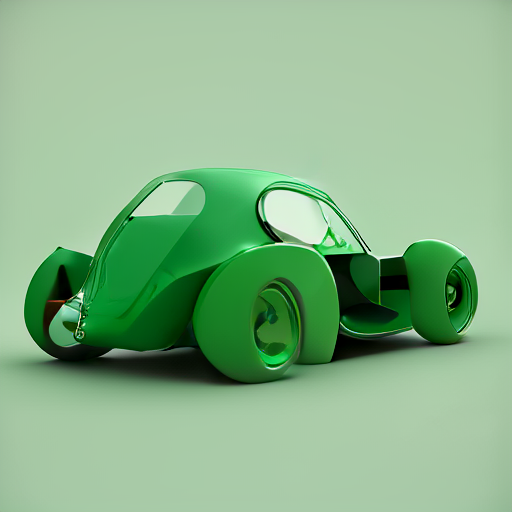

In [10]:
import torch
from diffusers import AmusedPipeline

pipe = AmusedPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "A green car with 3 wheels"
negative_prompt = "high quality,flashy"

image = pipe(prompt, negative_prompt=negative_prompt, generator=torch.manual_seed(0)).images[0]
image


Combined Both the models

In [12]:
import torch
import gradio as gr
from diffusers import AmusedPipeline
from transformers import pipeline

# Load Whisper AI model
transcriber = pipeline("automatic-speech-recognition", model="openai/whisper-base.en")

# Load Amused AI model for image generation
pipe = AmusedPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

def process_audio_and_generate_image(audio):
    if audio is None:
        return "No audio uploaded.", None
    
    # Transcribe voice note
    transcribed_text = transcriber(audio)["text"]
    
    # Generate image using the transcribed text as prompt
    negative_prompt = "High quality"
    image = pipe(transcribed_text, negative_prompt=negative_prompt, generator=torch.manual_seed(0)).images[0]

    return transcribed_text, image

# Create Gradio Interface
demo = gr.Interface(
    fn=process_audio_and_generate_image,
    inputs=gr.Audio(type="filepath"),
    outputs=["text", gr.Image(type="pil")],
    title="Voice-to-Image Generator",
    description="Upload a voice note, transcribe it using Whisper AI, and generate an image based on the transcription.",
    allow_flagging="never"
)

# Launch the app
demo.launch(share=True)


Device set to use cuda:0


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/gradio/interface.py:403: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://51645d0297fd0d225a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:512: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


  0%|          | 0/12 [00:00<?, ?it/s]